# Gini

## Content-Based Filter

    imports

In [6]:
import numpy as np
import pandas as pd

import requests

from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt

import re

from sklearn.metrics.pairwise import cosine_similarity

np.random.seed(137)

    read

In [7]:
model_df = pd.read_csv("../data/transformed/processed_content_filter_data.csv")
processed_content_filter_df = pd.read_csv("../data/transformed/processed_content_filter_data.csv")
processed_content_filter_df.head()

,LOAN_ID,DESCRIPTION,LOAN_AMOUNT,LOAN_USE,TAGS,FEMALE_OPERATED,ORIGINAL_LANGUAGE_Arabic,ORIGINAL_LANGUAGE_English,ORIGINAL_LANGUAGE_French,ORIGINAL_LANGUAGE_Indonesian,...,married woman,medical expenses,rancor,sanitary,school fees,single mother,user_favorite,volunteer_like,volunteer_pick,water filter
0,357587,"Ibtisam is a 41-year-old married lady, who kni...",925.0,to buy more wool and make more clothing items.,rancor,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,689681,Nemesiana is a married woman and a mother of t...,125.0,to buy fertilizer and pesticide,rancor,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
2,1589199,Chansamoul’s Group lives in a rural village in...,100.0,to buy a water filter to provide safe drinking...,"#Technology, #Eco-friendly, #Health and Sanita...",0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1471509,"Salim, 30, was orphaned at a young age and los...",575.0,to purchase more timber to sell.,user_favorite,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,423277,Cristina is fifty-one years old and married wi...,400.0,to buy beer and soda for wholesale distribution.,rancor,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
processed_content_filter_df = processed_content_filter_df.drop(
    ["user_favorite", "volunteer_like", "volunteer_pick", "rancor","DESCRIPTION","LOAN_AMOUNT",
     "LOAN_USE", "TAGS", "TAGS+", "TEXT","PROCESSED_TEXT", "LOAN_ID"], axis = 1).astype(np.uint8)

processed_content_filter_df.reset_index(inplace=True, drop=True)

processed_content_filter_df.to_csv("../data/transformed/X_df.csv", index=False)

### Content-based Filter

In [32]:
X = pd.read_csv("../data/transformed/X_df.csv")
X = X.to_numpy()

In [33]:
# pair column number with column name for manual grouping and selection
#[print(f"{i} {j}") for i, j in enumerate(X_df.columns)];

In [34]:
# create a synthetic user
#user_interests = np.random.binomial(1, 10/X.shape[1], X.shape[1])
#user_interests = np.reshape(user_interests, (1, -1))

In [35]:
# example input
user_interests = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [36]:
# Nearest vectors to synthetic user
rec = cosine_similarity(X, user_interests)

# index similarity scores
ordinals = [i for i in range(len(rec.ravel()))]
rec_ordinal = list(zip(rec.ravel(), ordinals))

# sort for top scores
sorted_index = sorted(rec_ordinal, key = lambda x: x[0], reverse=True)

# top 5 scores and loan ids
top_loan_ids = [(x, model_df.iloc[y][0]) for x, y in sorted_index[0:5]]
top_loan_ids

[(0.43301270189221935, 1503100),
 (0.37499999999999994, 1723158),
 (0.37499999999999994, 1446877),
 (0.35355339059327373, 1210221),
 (0.35355339059327373, 1160682)]

### Recommendation Output Tests

    Generate Loan Visuals: Brian Rubin and Matthew Ludwig

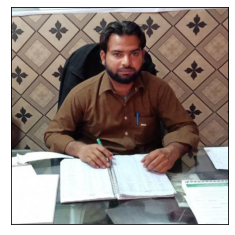

Abdul  Jabbar
Pakistan
{'name': 'Education'}
to pay for the construction of classrooms in his school.
2175.00
Abdul Jabbar, a 28-year-old man has 8 years' experience as an administrator of the school. His school has 282 students out of which 45% are female students. Abdul Jabbar is determined to educate all the people in his community who belong to low-income families. He said, “It is everyone’s right to get quality education even if they are unable to afford it in monetary terms”.<br /><br />He charges minimal fees so that more students can opt for a bright future. His school currently needs money to p...


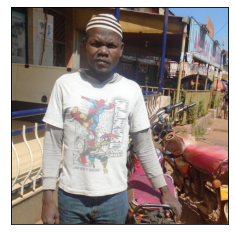

Ibrahim
Uganda
{'name': 'Education'}
to pay his children's school fees and also repair his motorcycle.
275.00
Ibrahim, 36, is married with children in school. He is a motorcyclist in Jinja, and this is his main source of income. He  is a responsible and hard working man. <br /><br />He is seeking for a loan of 1,000,000 UGX to pay part of the school fees for his children and repair his motorcycle so that he can stay in business. He is grateful for the support....


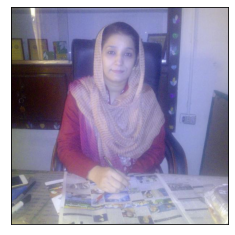

Sidra
Pakistan
{'name': 'Education'}
with the construction of classrooms.
1825.00
Sidra is a 37-year-old woman who runs a school in a small community. There are 300 students enrolled in the school, and 51% of them are female students. The aim of her school is to make full use of the time, resources, and talents of the students. She encourages her students to indulge in lifelong learning, have harmonious relationships with their peers, and have respect for all members of the school. <br /><br />Currently, to provide a supportive physical environment, Sidra needs funds for the ...


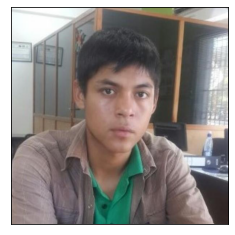

Carlos
Paraguay
{'name': 'Education'}
to pay university dues.
375.00
Carlos is studying electrical engineering. He comments that it is very important to complete his studies and to be a good professional to work in his field.<br /><br />He comments that by means of his studies, he wants to open up doors. He requests this loan to be able to pay for university dues, and this way be able continue his studies as he has been....


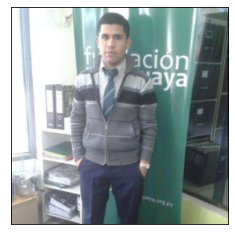

Ramon
Paraguay
{'name': 'Education'}
to pay the fees for his program.
375.00
Ramón is studying business administration.  His goals are to graduate as a business professional, be an excellent professional in his job, and continue to grow.<br /><br />Currently he's working and going to school at the same time so he has the means to cover his school expenses.<br /><br />He's requesting this loan so he can pay the fees for his program....


In [37]:
for i in range(5):
    # find top_loan_ids
    loan_id = top_loan_ids[i][1]
    
    # url for api call plus query
    base_url = 'https://api.kivaws.org/graphql?query='
    graphql_query = '{lend {loan (id: %s){id name gender image {id url} description use geocode{country{name}} loanAmount sector{name}}}}'   %loan_id

    # send request
    r = requests.post(base_url + graphql_query)
    r = r.json()
    url = r['data']['lend']['loan']['image']['url']
    url_600 = re.sub("s100", "s600", url) #default url return is dpi 100 change to dpi 600
    response = requests.get(url_600)
    
    img = Image.open(BytesIO(response.content))
    img.resize((500,500), Image.ANTIALIAS) # add antialiasing
    
    # removing ticks from x/y axis
    # https://www.delftstack.com/howto/matplotlib/how-to-hide-axis-text-ticks-and-or-tick-labels-in-matplotlib/
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    
    plt.imshow(img)
    plt.show()
    
    # printing data under picture for top loan results
    print(r["data"]["lend"]["loan"]["name"])
    print(r["data"]["lend"]["loan"]["geocode"]["country"]["name"])
    print(r["data"]["lend"]["loan"]["sector"])
    print(r["data"]["lend"]["loan"]["use"])
    print(r["data"]["lend"]["loan"]["loanAmount"])
    print(re.sub("\\r|\\n|\\t|---", "", r["data"]["lend"]["loan"]["description"])[0:500] + "...")

    Experiment to output relevant information from recommended LOAN_IDs: Brian Rubin

In [38]:
df = pd.read_csv("../data/raw/loans.csv", nrows = 10000)

In [39]:
def kiva_output(loan_1, loan_2, loan_3):
    #return details from loans_df on each loan : Name, Gender, Loan Amount, Activity/Sector Name, Description, Country
    x = df.query(f"LOAN_ID == {loan_1}")[['LOAN_NAME', 'BORROWER_GENDERS', 'LOAN_AMOUNT', 'ACTIVITY_NAME', 'SECTOR_NAME', 'DESCRIPTION', 'COUNTRY_NAME']]
    y = df.query(f"LOAN_ID == {loan_2}")[['LOAN_NAME', 'BORROWER_GENDERS', 'LOAN_AMOUNT', 'ACTIVITY_NAME', 'SECTOR_NAME', 'DESCRIPTION', 'COUNTRY_NAME']]
    z = df.query(f"LOAN_ID == {loan_3}")[['LOAN_NAME', 'BORROWER_GENDERS', 'LOAN_AMOUNT', 'ACTIVITY_NAME', 'SECTOR_NAME', 'DESCRIPTION', 'COUNTRY_NAME']]
    #combine all loan details into one dataframe 
    final = pd.concat([x, y, z])
    return final

In [40]:
df["LOAN_ID"][0:3]

0    1737446
1    1274681
2    1552694
Name: LOAN_ID, dtype: int64

In [41]:
kiva_output(1737446, 1274681, 1552694)

,LOAN_NAME,BORROWER_GENDERS,LOAN_AMOUNT,ACTIVITY_NAME,SECTOR_NAME,DESCRIPTION,COUNTRY_NAME
0,Emelisa,female,125.0,General Store,Retail,Emelisa is 32 years old. With two children in...,Philippines
1,Samol,female,1000.0,Personal Housing Expenses,Housing,Samol is married and she lives with her husban...,Cambodia
2,ABLA,female,200.0,Food Production/Sales,Food,Abla est une femme célibataire qui habite à Ag...,Togo
